In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # to visualize data
%matplotlib inline
import seaborn as sns
import squarify

In [2]:
# loaing the data and using "unicode_escape" to avoid error
df = pd.read_csv(r"D:\kunal\others\folder for git\Diwali_sales_Analysis\Diwali Sales Data.csv", encoding = "unicode_escape")

In [8]:
df.shape

(11251, 15)

In [9]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
# drop unrelated/blank columns using inplace to save the change like droping the column
df.drop(['Status', "unnamed1"], axis = 1, inplace = True)

In [12]:
# check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
# drop null values
df.dropna(inplace = True)

In [14]:
# to check the changed shape of the data after dropin null
df.shape

(11239, 13)

In [15]:
# to change the data type of the amount column from float to int
df['Amount'] = df['Amount'].astype('int')

In [16]:
# to check the changes of column data type
df['Amount'].dtypes

dtype('int64')

In [17]:
# to check the columns in the data frame
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
df.rename(columns = {'Cust_name' : 'Custumer_Name'})

,User_ID,Custumer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [19]:
# describe() method returns standard descriptive statistics of the DataFrame
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [20]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

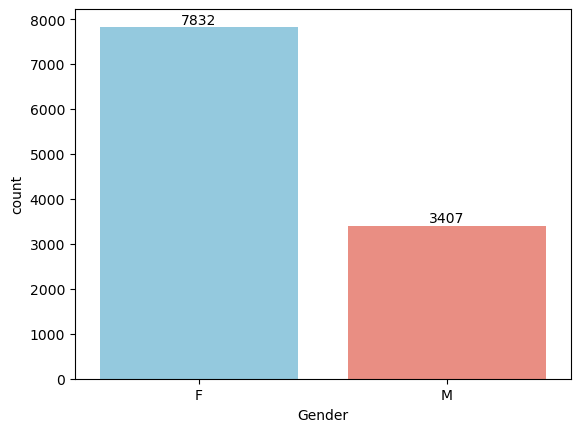

In [21]:
# To see the total count of the gender of the customer in graphical representation
gx = sns.countplot(x = 'Gender', data = df, palette = ["skyblue", "salmon"], hue = 'Gender')

for bars in gx.containers:
    gx.bar_label(bars)
plt.show()

In [22]:
# To see the total number of each gender as customer in the business
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


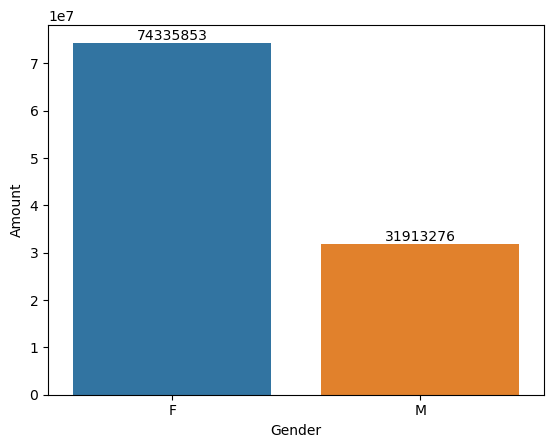

In [23]:
# To see the gender of the custumer in the sales
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
gx = sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen, hue = 'Gender')
for bars in gx.containers:
    gx.bar_label(bars, fmt='%.0f')

Female customers generate more than twice the sales revenue compared to male customers. Target marketing efforts toward female buyers to maximize sales during Diwali.

## Age

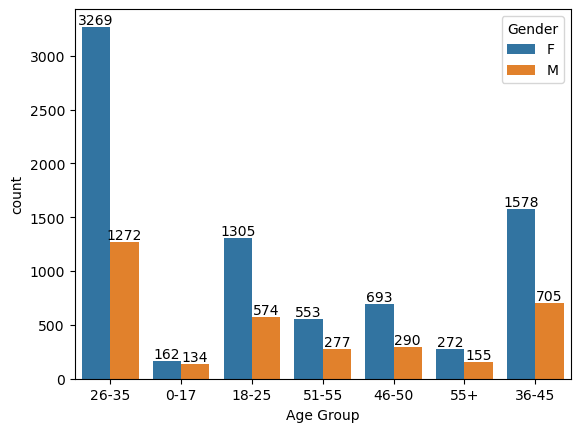

In [24]:
# To see the age group of the gender 
gx = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in gx.containers:
    gx.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

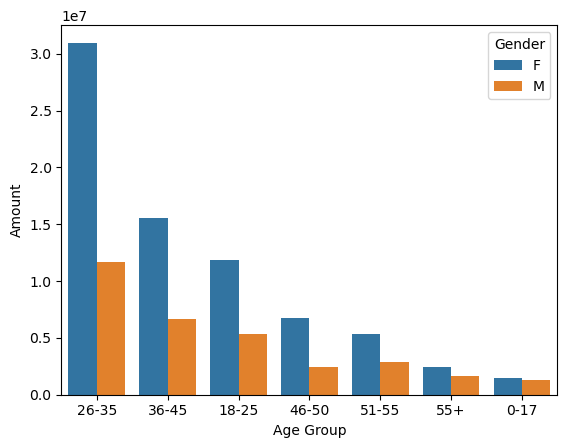

In [25]:
# Total amount spent in each age group 
sales_age_gender = df.groupby(['Age Group', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', hue='Gender', data=sales_age_gender)


From the above graph we can see that most of the customer are in the age group between 26-35 yrs female

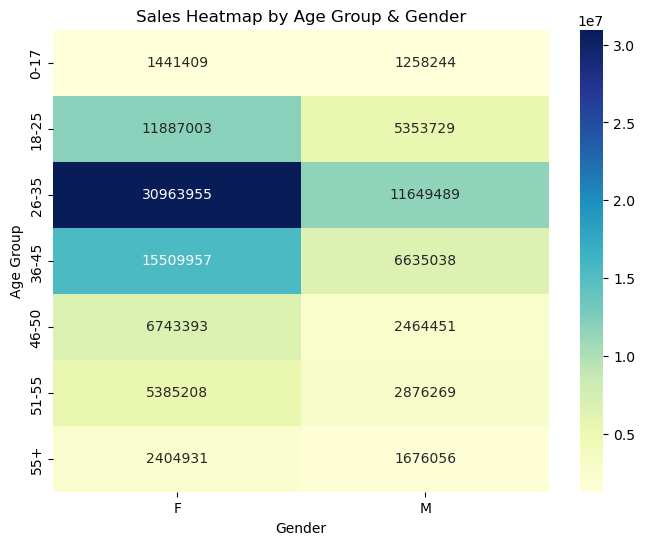

In [6]:
# To see the sales insight for each age group and gender
# Pivot for heatmap
heatmap_data = df.pivot_table(values='Amount', index='Age Group', columns='Gender', aggfunc='sum')

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Sales Heatmap by Age Group & Gender")
plt.show()


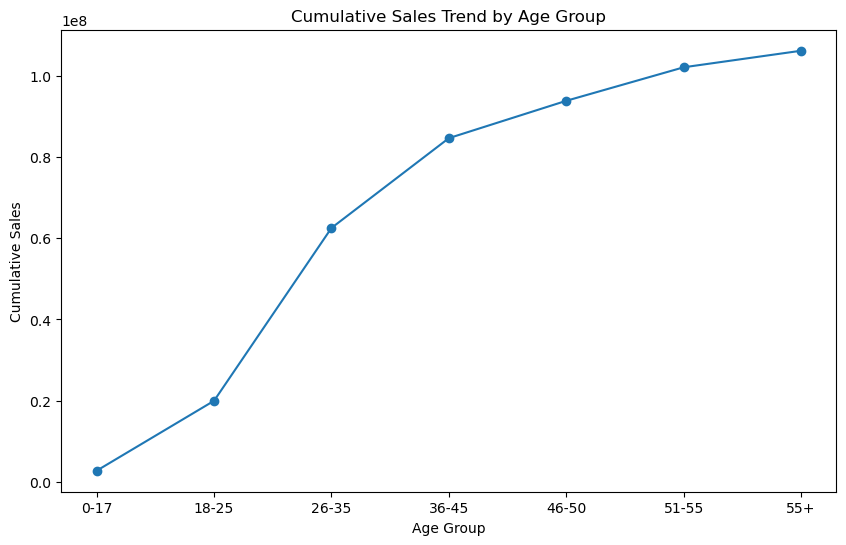

In [16]:
#Cumulative Sales Trend by Age Group
age_sales = df.groupby('Age Group')['Amount'].sum().cumsum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(age_sales['Age Group'], age_sales['Amount'], marker='o')
plt.title("Cumulative Sales Trend by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Cumulative Sales")
plt.show()


## State

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

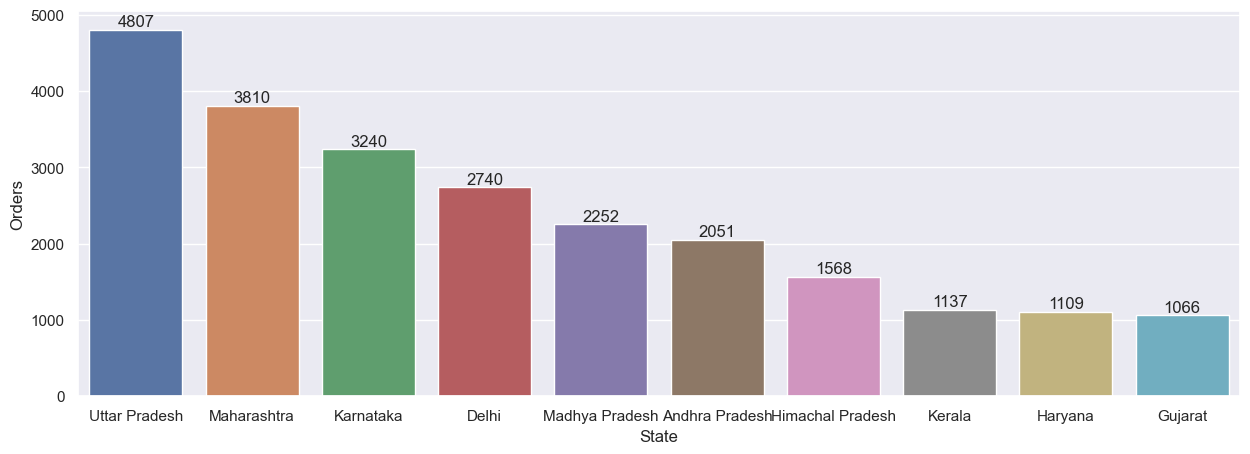

In [27]:
# Total number of the orders from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending=False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
gx = sns.barplot(data = sales_state, x = 'State', y = 'Orders', hue = 'State')
for container in gx.containers:
    gx.bar_label(container, fmt='%.0f')

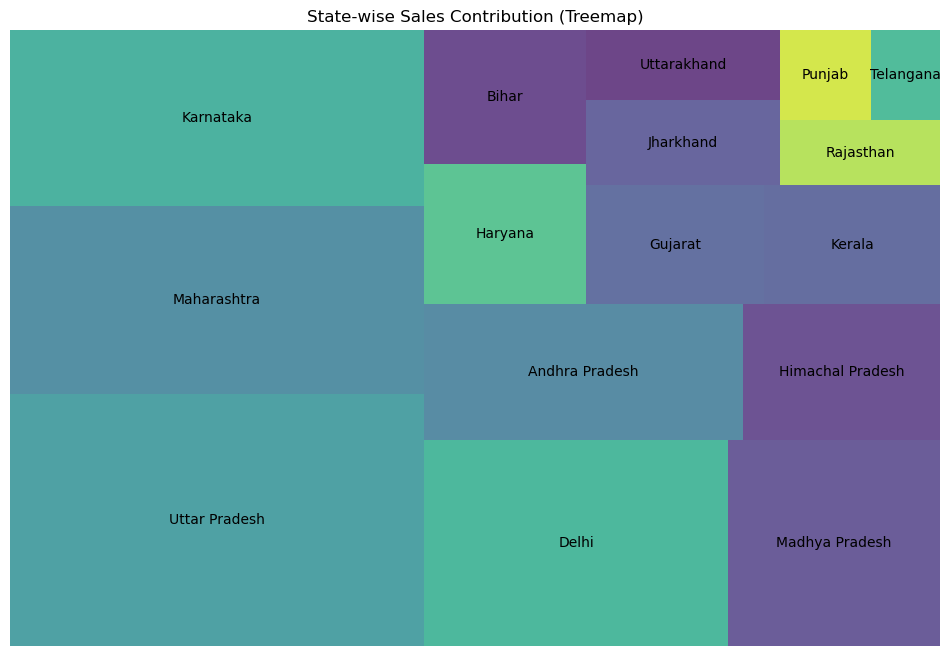

In [14]:
# State wise contribution in 
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,8))
squarify.plot(sizes=state_sales['Amount'], label=state_sales['State'], alpha=0.8)
plt.title("State-wise Sales Contribution (Treemap)")
plt.axis('off')
plt.show()


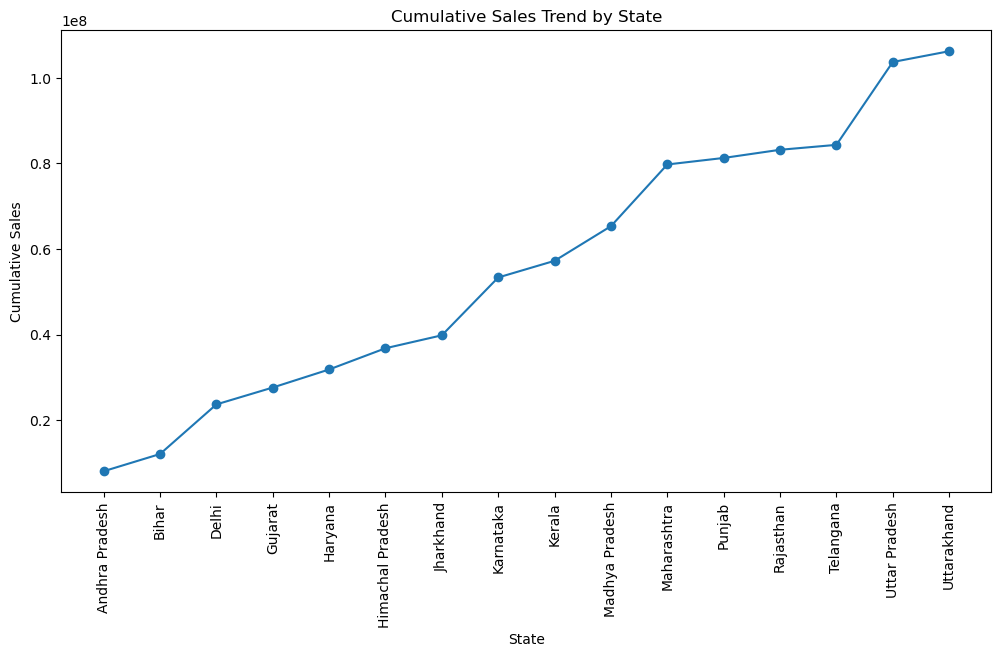

In [17]:
#Cumulative Sales Trend by State

state_sales = df.groupby('State')['Amount'].sum().cumsum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(state_sales['State'], state_sales['Amount'], marker='o')
plt.title("Cumulative Sales Trend by State")
plt.xlabel("State")
plt.ylabel("Cumulative Sales")
plt.xticks(rotation=90)
plt.show()

from the above graph we can see that unexpectedly most of the orders are from the Uttar Pradesh, Maharashtra and Karnataka respectfully

## Marital Status

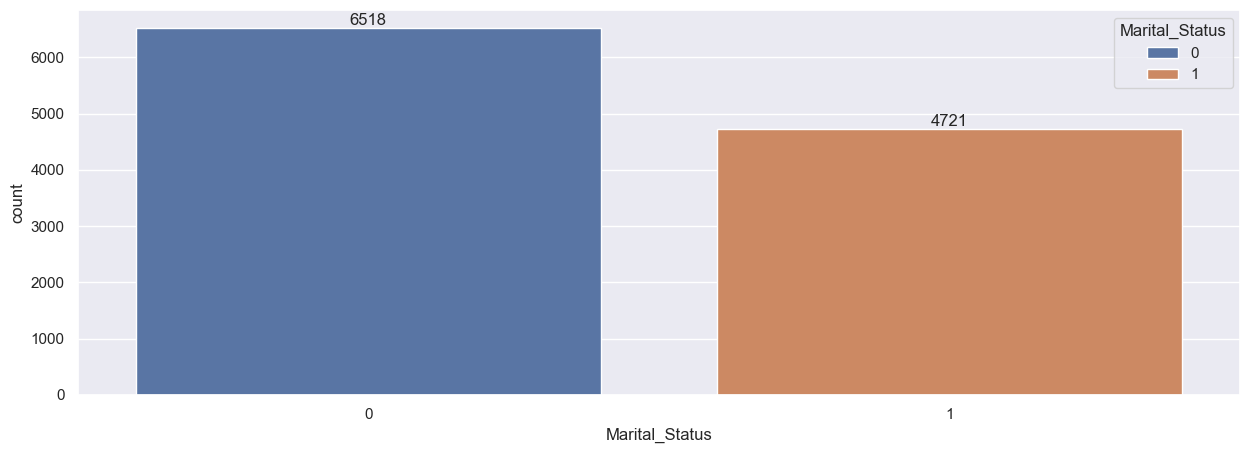

In [28]:
gx = sns.countplot(data = df, x = 'Marital_Status', hue = 'Marital_Status')

sns.set(rc = {'figure.figsize':(7,5)})
for bars in gx.containers:
    gx.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

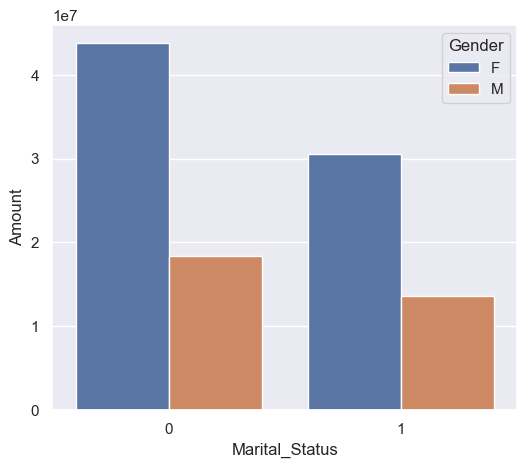

In [29]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)

sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

from above graph we can see that most of the customer are married (women) and they have high purchasing power

## Occupation

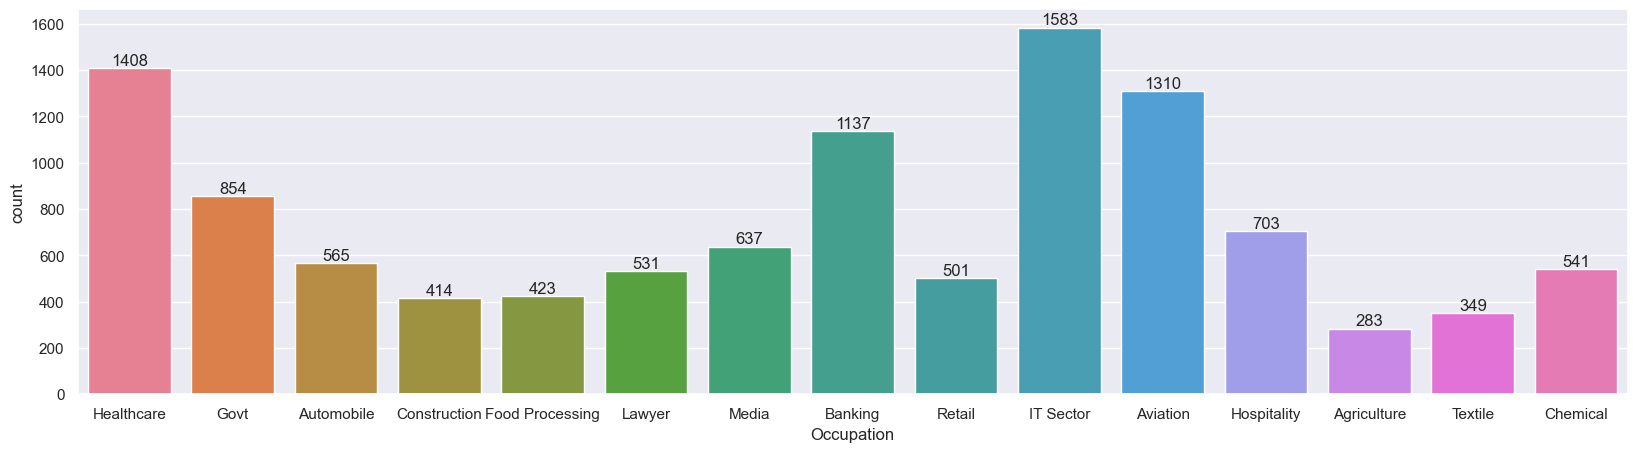

In [30]:
sns.set(rc = {'figure.figsize':(20,5)})
gx = sns.countplot(data = df, x = 'Occupation', hue = 'Occupation')  # example categorical hue

for bars in gx.containers:
    gx.bar_label(bars)



<Axes: xlabel='Occupation', ylabel='Amount'>

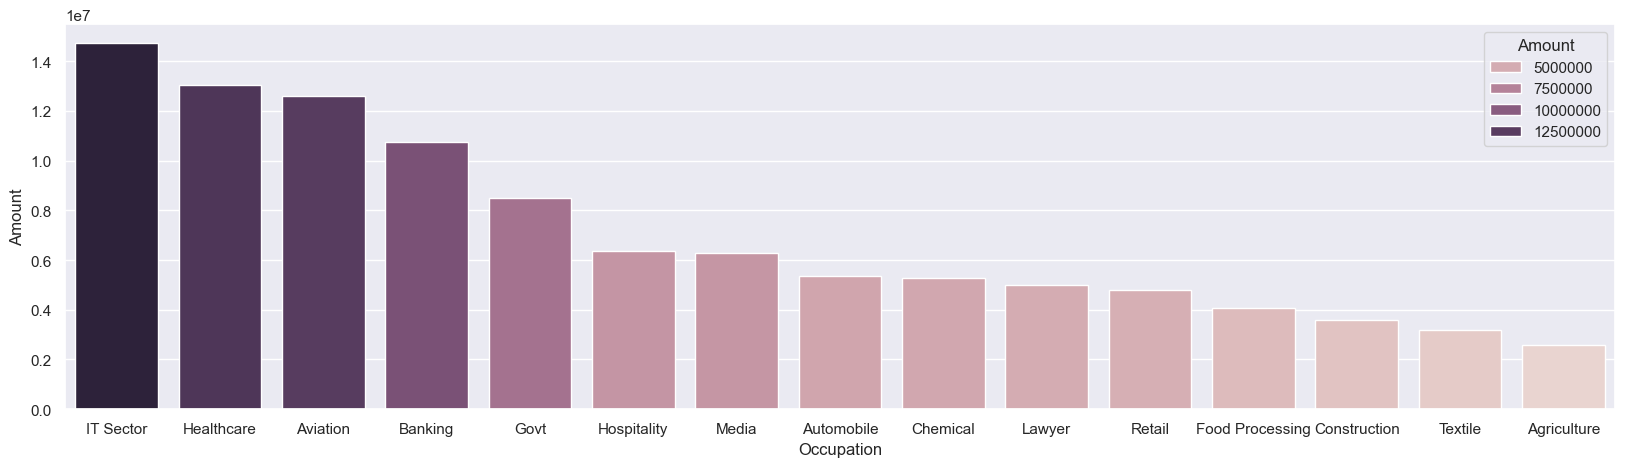

In [31]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount', hue = 'Amount')

from above graph we can see that most of the buyer are working in IT, Aviation and health sector

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Product Category

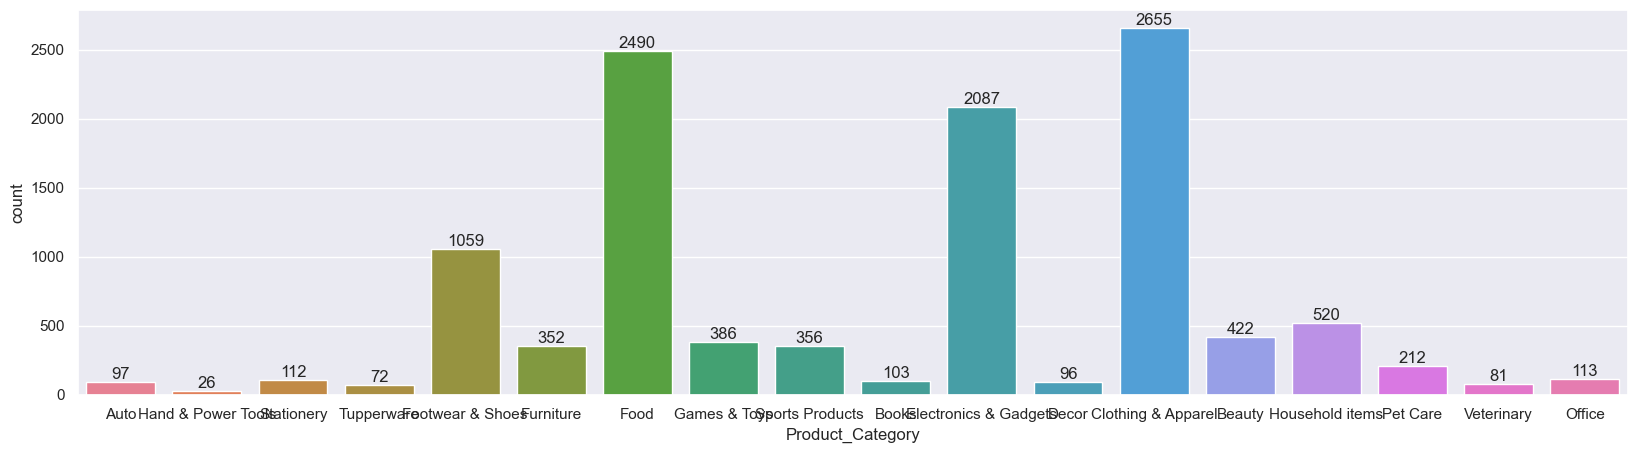

In [34]:
sns.set(rc = {'figure.figsize': (20, 5)})
ax = sns.countplot(data = df, x = 'Product_Category', hue = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

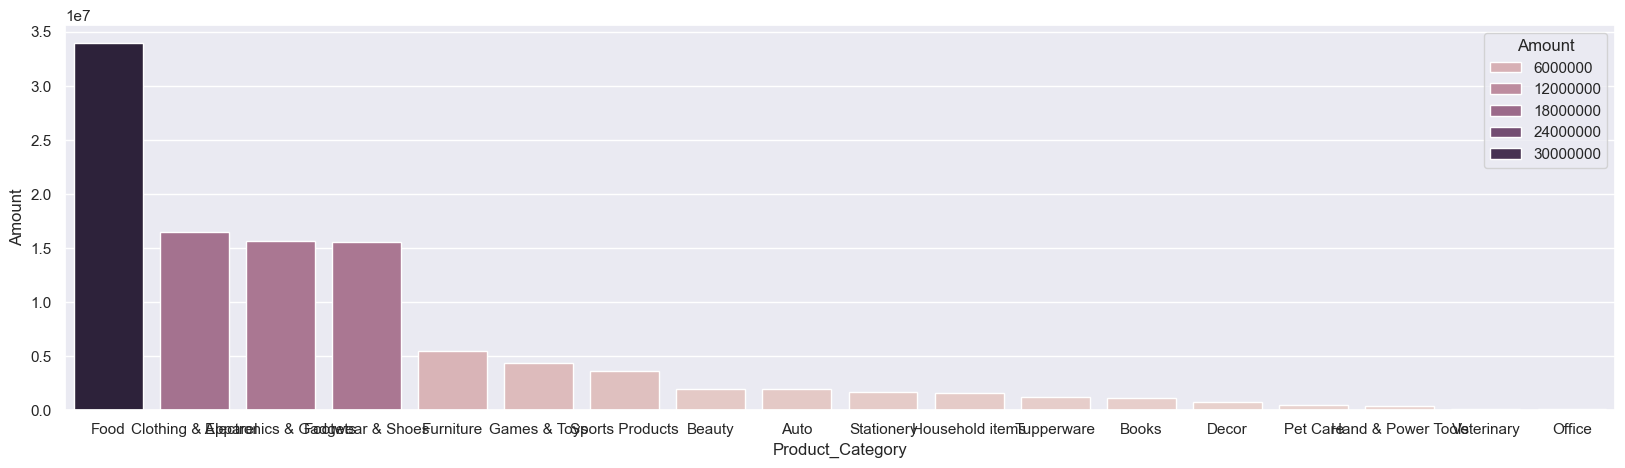

In [35]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount', hue = 'Amount')

From above graph we can see that most of the cold product are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

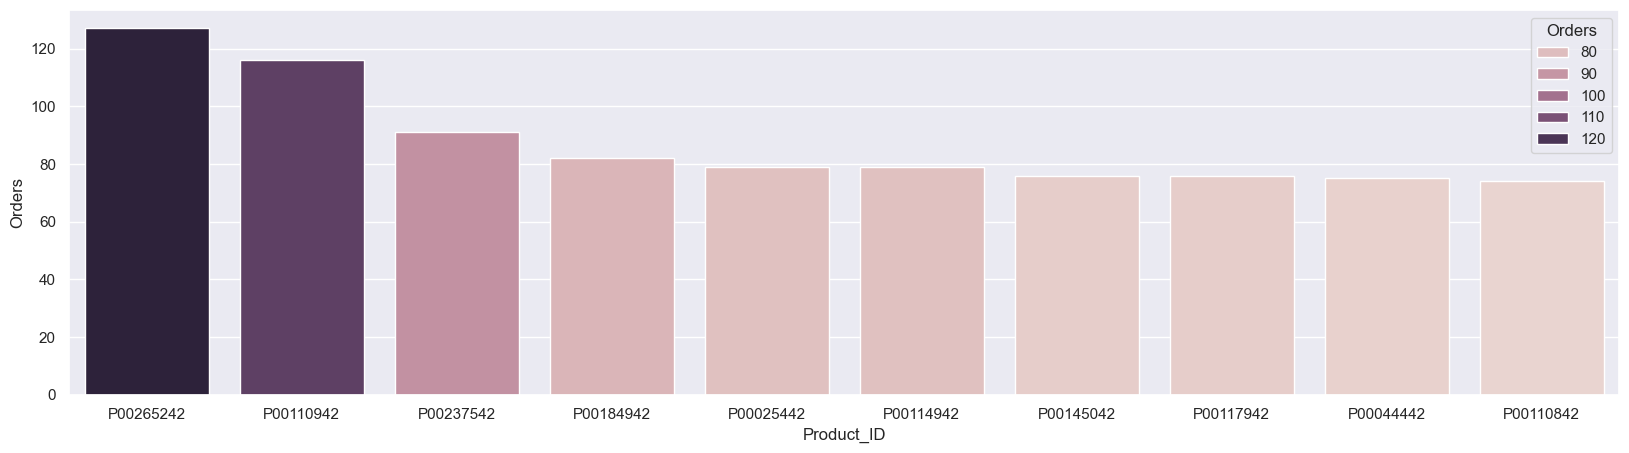

In [36]:
sales_state = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending=False).head(10)

sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID', y = 'Orders', hue = 'Orders')

<Axes: xlabel='Product_ID'>

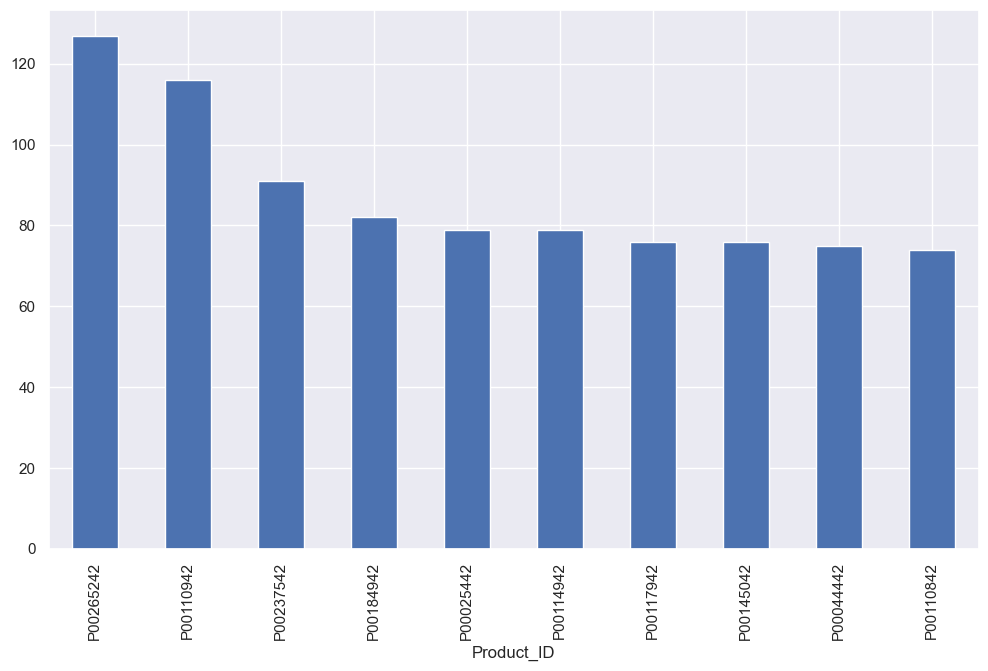

In [37]:
#  Top 10 most sold products
fig1, gx1 = plt.subplots(figsize = (12, 7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')

# Business Insights from Diwali Sales Analysis

1. Gender-wise Sales Distribution
Female customers contribute over twice the total sales revenue compared to male customers. This indicates a stronger purchasing power or product preference among women during the Diwali season.
Recommendation: Tailor marketing campaigns, product launches, and festive promotions specifically toward female customers to maximize sales impact.

2. Age Group Performance
The majority of sales come from customers in the 26-45 years age bracket, signifying this demographic as the core buyer segment during the festive period.
Recommendation: Focus advertising and product offers on this age group. Innovate product packaging, pricing, and merchandising to appeal to their preferences and lifestyle.

3. Regional Sales Concentration
Sales data shows heavy concentration in the Western zone, especially Maharashtra, and significant activity in Southern states like Andhra Pradesh. This suggests these regions have higher market penetration and consumer demand for Diwali-related products.
Recommendation: Optimize inventory levels and regional marketing spend for these high-demand zones to reduce stockouts and leverage regional festival sentiments effectively.

4. Product Category Insights
Certain categories such as Healthcare, Government, and Automobile-related products lead in sales volume. These categories likely resonate strongly with the buyer audience during Diwali celebrations.
Recommendation: Consider bundling high-demand categories with complementary products to increase average order value. Launch category-specific discount offers to stimulate further buying.

5. Order Frequency and Customer Loyalty
Most customers place between 1 to 3 orders during the Diwali season, indicating moderate purchase frequency.
Recommendation: Introduce loyalty programs, repeat purchase incentives, and personalized follow-ups to encourage higher order frequencies and boost customer lifetime value.

6. Sales Amount Variability
There is a wide variation in sales amounts, ranging from low-budget to premium purchases. This highlights diverse customer segments with distinct spending capabilities.
Recommendation: Implement segmented promotions and product recommendations catering separately to budget-conscious customers and premium  buyers. Use data-driven personalization to enhance sales conversion.



# Conclusion

Married women age group 26 - 35 yrs from UP, Maharashtra and Karnataka working in IT, Aviation and Healthcare are more likely to buy product from Food, Clothing and Electronic Catogory 